In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import random

In [9]:
#generate fake alert/case data
def generate_alert_case_data_v2(months=12):
    """
    Generates fake alert and case data for a specified number of months
    with a flat structure and specific rules for alert/case creation and closure.

    Columns: alert_id, alert_create_date, alert_closed_date, case_id, case_create_date, case_closed_date, source.

    Rules:
    - 5 sources: cash, emt, wire, visa, eft.
    - 1000-1500 alerts opened and closed per day.
    - 5-15% of closed alerts convert to cases.
    - Case created same day as converting alert is closed.
    - Cases take ~60 days to close after creation.
    - Data for 12 months.

    Args:
        months: The number of months of data to generate.

    Returns:
        pandas.DataFrame: A DataFrame containing the fake alert and case data.
    """

    start_date = datetime.datetime.now()
    end_date = start_date + datetime.timedelta(days=months * 30) #approx 30 days per month
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    sources = ['cash', 'emt', 'wire', 'visa', 'eft']
    data = []
    alert_id_counter = 1
    case_id_counter = 1

    for date in date_range:
        num_alerts_today = random.randint(1000, 1500) # Generate between 1000 to 1500 alerts per day

        for _ in range(num_alerts_today):
            alert_create_date = date + datetime.timedelta(hours=random.randint(8, 18), minutes=random.randint(0, 59), seconds=random.randint(0, 59)) # Business hours focus for create
            alert_closed_date = date + datetime.timedelta(hours=random.randint(9, 19), minutes=random.randint(0, 59), seconds=random.randint(0, 59)) # Business hours focus for close, slightly after create

            alert_entry = {
                'alert_id': f'alert_{alert_id_counter}',
                'alert_create_date': alert_create_date,
                'alert_closed_date': alert_closed_date,
                'case_id': None,
                'case_create_date': None,
                'case_closed_date': None,
                'source': random.choice(sources)
            }

            # 5-15% chance of alert converting to case
            if random.random() < random.uniform(0.05, 0.15): # Random percentage between 5% and 15%
                case_create_date = alert_closed_date # Case created on alert closed date
                case_closed_days = random.randint(50, 70) # Case closed roughly 60 days later (range for variation)
                case_closed_date = case_create_date + datetime.timedelta(days=case_closed_days, hours=random.randint(0, 12)) # Variation in hours too

                alert_entry['case_id'] = f'case_{case_id_counter}'
                alert_entry['case_create_date'] = case_create_date
                alert_entry['case_closed_date'] = case_closed_date
                case_id_counter += 1

            data.append(alert_entry)
            alert_id_counter += 1

    df = pd.DataFrame(data)
    return df

# Generate 12 months of data
fake_data_df_v2 = generate_alert_case_data_v2(months=12)

fake_data_df_v2

,alert_id,alert_create_date,alert_closed_date,case_id,case_create_date,case_closed_date,source
0,alert_1,2025-02-08 14:39:37.859043,2025-02-08 07:26:38.859043,case_1,2025-02-08 07:26:38.859043,2025-04-11 14:26:38.859043,emt
1,alert_2,2025-02-08 08:45:17.859043,2025-02-08 13:35:19.859043,None,NaT,NaT,emt
2,alert_3,2025-02-08 15:18:35.859043,2025-02-08 11:34:12.859043,None,NaT,NaT,visa
3,alert_4,2025-02-08 09:45:20.859043,2025-02-08 08:29:28.859043,None,NaT,NaT,eft
4,alert_5,2025-02-08 05:13:17.859043,2025-02-08 09:56:08.859043,case_2,2025-02-08 09:56:08.859043,2025-04-14 13:56:08.859043,wire
...,...,...,...,...,...,...,...
449727,alert_449728,2026-02-03 09:23:53.859043,2026-02-03 12:45:00.859043,None,NaT,NaT,wire
449728,alert_449729,2026-02-03 13:57:56.859043,2026-02-03 08:36:25.859043,None,NaT,NaT,eft
449729,alert_449730,2026-02-03 13:36:19.859043,2026-02-03 14:03:30.859043,None,NaT,NaT,cash
449730,alert_449731,2026-02-03 06:34:57.859043,2026-02-03 12:47:59.859043,None,NaT,NaT,emt


In [10]:
# Optional: Save to CSV
fake_alert_case_data.to_excel("~/Documents/fake_data_df_v2.xlsx", index=False) # Using ~ shortcut

/Users/joemcdougall/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/joemcdougall/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/joemcdougall/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/joemcdougall/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/joemcdougall/opt/anaconda3/lib/python

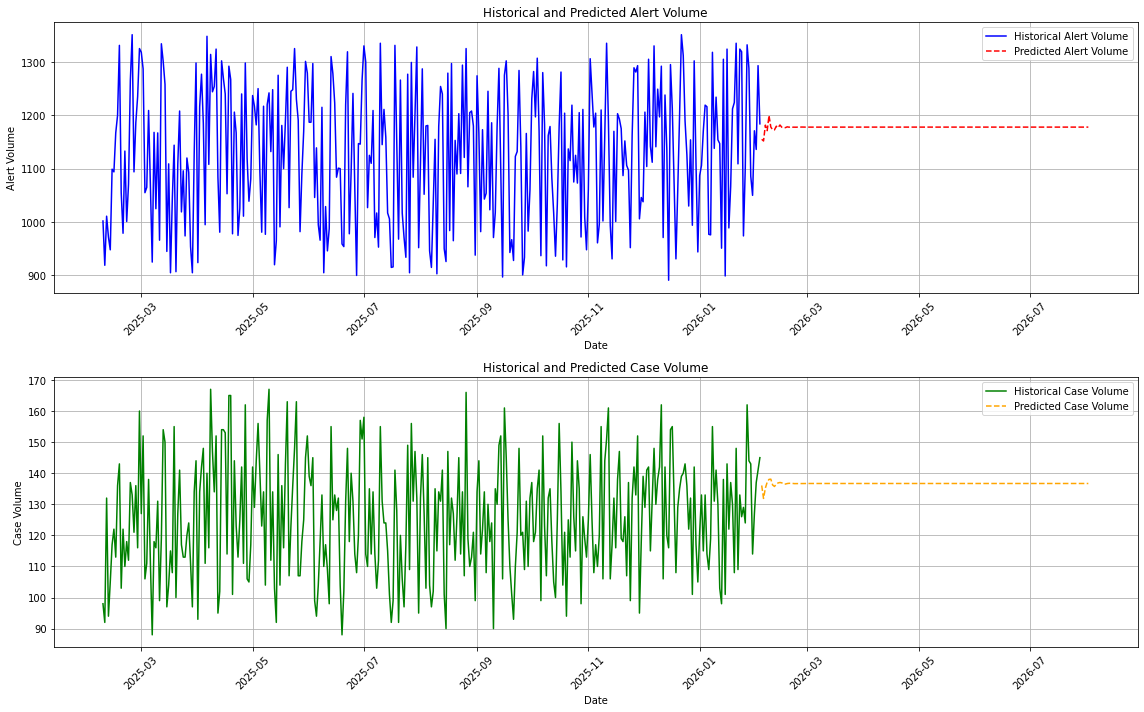

In [17]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def predict_separate_alert_case_volume(df, prediction_days=180, alert_model_order=(5,1,0), case_model_order=(5,1,0)):
    """
    Predicts future alert and case volume separately using ARIMA models based on historical data.
    Handles cases where historical data might be empty.

    Args:
        df (pd.DataFrame): DataFrame with historical alert and case data
                           (output from generate_alert_case_data_v2).
        prediction_days (int): Number of days to predict into the future (e.g., 180 for 6 months).
        alert_model_order (tuple): Order (p, d, q) for the ARIMA model for alerts.
        case_model_order (tuple): Order (p, d, q) for the ARIMA model for cases.

    Returns:
        pd.DataFrame: DataFrame containing historical and predicted alert and case volume, or empty DataFrames if historical data is missing.
    """

    # 1. Aggregate Daily Alert and Case Volume Separately
    daily_alert_volume = df[df['case_id'].isnull()].groupby(df['alert_create_date'].dt.date).size().reset_index(name='alert_volume')
    daily_alert_volume['date'] = pd.to_datetime(daily_alert_volume['alert_create_date'])
    daily_alert_volume = daily_alert_volume.set_index('date')
    daily_alert_volume = daily_alert_volume[['alert_volume']]

    daily_case_volume = df[df['case_id'].notnull()].groupby(df['case_create_date'].dt.date).size().reset_index(name='case_volume')
    daily_case_volume['date'] = pd.to_datetime(daily_case_volume['case_create_date'])
    daily_case_volume = daily_case_volume.set_index('date')
    daily_case_volume = daily_case_volume[['case_volume']]

    # Handle cases where there is no historical data for alerts or cases
    if daily_alert_volume.empty:
        print("Warning: No historical alert data found. Cannot predict alert volume.")
        empty_alert_prediction = pd.DataFrame({'alert_volume': []}).set_index(pd.DatetimeIndex([])).rename_axis('date')
        alert_model_fit = None # Return None to indicate no model fit
    else:
        full_date_range = pd.date_range(start=daily_alert_volume.index.min(), end=daily_alert_volume.index.max(), freq='D')
        daily_case_volume = daily_case_volume.reindex(full_date_range, fill_value=0).rename_axis('date') # Reindex case volume based on alert date range
        daily_volume = pd.concat([daily_alert_volume, daily_case_volume], axis=1).fillna(0) # Join and fill NaNs

        # 2. Train ARIMA Models Separately for Alerts and Cases
        alert_model = ARIMA(daily_volume['alert_volume'], order=alert_model_order)
        alert_model_fit = alert_model.fit()

        # 3. Make Alert Predictions
        forecast_steps = prediction_days
        alert_forecast = alert_model_fit.forecast(steps=forecast_steps)
        alert_forecast_index = pd.date_range(daily_volume.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
        alert_forecast_series = pd.Series(alert_forecast, index=alert_forecast_index, name='predicted_alert_volume')

        # 4. Combine Historical and Predicted Alert Data
        historical_alert_volume = daily_volume['alert_volume']
        combined_alert_data = pd.concat([historical_alert_volume, alert_forecast_series])
        combined_alert_df = pd.DataFrame(combined_alert_data, columns=['alert_volume']) # Create separate DF for alerts
        combined_alert_df.index.name = 'date'

    if daily_case_volume.empty: # Check for empty case volume separately as it could happen independently
        print("Warning: No historical case data found. Cannot predict case volume.")
        empty_case_prediction = pd.DataFrame({'case_volume': []}).set_index(pd.DatetimeIndex([])).rename_axis('date')
        case_model_fit = None # Return None to indicate no model fit
    else:
        # 2. (Continued) Train ARIMA Models Separately for Cases (if data exists)
        case_model = ARIMA(daily_volume['case_volume'], order=case_model_order)
        case_model_fit = case_model.fit()

        # 3. (Continued) Make Case Predictions
        forecast_steps = prediction_days
        case_forecast = case_model_fit.forecast(steps=forecast_steps)
        case_forecast_index = pd.date_range(daily_volume.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
        case_forecast_series = pd.Series(case_forecast, index=case_forecast_index, name='predicted_case_volume')

        # 4. (Continued) Combine Historical and Predicted Case Data
        historical_case_volume = daily_volume['case_volume']
        combined_case_data = pd.concat([historical_case_volume, case_forecast_series])
        combined_case_df = pd.DataFrame(combined_case_data, columns=['case_volume']) # Create separate DF for cases
        combined_case_df.index.name = 'date'


    # 5. Combine Alert and Case Predictions (handle empty cases)
    if daily_alert_volume.empty: # If no alert history, return empty combined DF for alerts
        combined_alert_df = empty_alert_prediction
    if daily_case_volume.empty: # If no case history, return empty combined DF for cases
        combined_case_df = empty_case_prediction

    combined_df = pd.concat([combined_alert_df['alert_volume'], combined_case_df['case_volume']], axis=1) # Always combine - handles empty DFs due to prior checks

    return combined_df, alert_model_fit, case_model_fit


# Generate historical data (if you haven't already)
fake_data_df_v2 = generate_alert_case_data_v2(months=12)

# Predict future volume - 6 months out
prediction_df_separate, alert_arima_model_fit, case_arima_model_fit = predict_separate_alert_case_volume(fake_data_df_v2, prediction_days=180)


# 5. Visualize Results - Separate Plots (modified to handle potentially empty prediction_df_separate)
if not prediction_df_separate.empty: # Only plot if there's data to plot.
    plt.figure(figsize=(16, 10))

    # Subplot 1: Alerts
    plt.subplot(2, 1, 1) # 2 rows, 1 column, first subplot
    if 'alert_volume' in prediction_df_separate.columns and not prediction_df_separate['alert_volume'].dropna().empty: # Check if alert data exists before plotting
        plt.plot(prediction_df_separate.index[:-180], prediction_df_separate['alert_volume'][:-180], label='Historical Alert Volume', color='blue')
        plt.plot(prediction_df_separate.index[-180:], prediction_df_separate['alert_volume'][-180:], label='Predicted Alert Volume', color='red', linestyle='dashed')
        plt.title('Historical and Predicted Alert Volume')
        plt.xlabel('Date')
        plt.ylabel('Alert Volume')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        plt.title('No Historical Alert Data to Plot')
        plt.ylabel('Alert Volume')


    # Subplot 2: Cases
    plt.subplot(2, 1, 2) # 2 rows, 1 column, second subplot
    if 'case_volume' in prediction_df_separate.columns and not prediction_df_separate['case_volume'].dropna().empty: # Check if case data exists before plotting
        plt.plot(prediction_df_separate.index[:-180], prediction_df_separate['case_volume'][:-180], label='Historical Case Volume', color='green')
        plt.plot(prediction_df_separate.index[-180:], prediction_df_separate['case_volume'][-180:], label='Predicted Case Volume', color='orange', linestyle='dashed')
        plt.title('Historical and Predicted Case Volume')
        plt.xlabel('Date')
        plt.ylabel('Case Volume')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        plt.title('No Historical Case Data to Plot')
        plt.ylabel('Case Volume')


    plt.show()
else:
    print("Warning: No historical data available for predictions, plots not generated.")


# Optional: Model Diagnostics (for both Alert and Case models) - conditional on models being fit
# if alert_arima_model_fit:
#     print("\nAlert ARIMA Model Summary:")
#     print(alert_arima_model_fit.summary())
# if case_arima_model_fit:
#     print("\nCase ARIMA Model Summary:")
#     print(case_arima_model_fit.summary())

# residuals_alert = pd.DataFrame(alert_arima_model_fit.resid)
# residuals_case = pd.DataFrame(case_arima_model_fit.resid)

# fig, axes = plt.subplots(2,2, figsize=(12,8))

# residuals_alert.plot(title="Alert Residuals", ax=axes[0,0])
# residuals_alert.plot(kind='kde', title='Alert Density', ax=axes[0,1])
# residuals_case.plot(title="Case Residuals", ax=axes[1,0])
# residuals_case.plot(kind='kde', title='Case Density', ax=axes[1,1])

# plt.tight_layout()
# plt.show()

# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(daily_volume['alert_volume'], title='ACF of Daily Alert Volume')
# plot_pacf(daily_volume['alert_volume'], title='PACF of Daily Alert Volume')
# plt.show()
# plot_acf(daily_volume['case_volume'], title='ACF of Daily Case Volume')
# plot_pacf(daily_volume['case_volume'], title='PACF of Daily Case Volume')
# plt.show()